In [1]:
import pandas as pd
pd.options.display.max_rows = 10

df = pd.read_csv('youtube-comments.csv', index_col=0)
df

,Comment,Time,Likes,Reply Count
Name,,,,
gjp,2:01,2021-09-29T15:01:58Z,0,0.0
Edie Behnke,WHY MEDICAL SUPPLIES ARE SCAM ARTISTS. LOCATED...,2021-04-09T01:44:05Z,0,0.0
Paintball4life,Vechain. look into it. Not financial advice,2021-03-11T04:58:12Z,0,0.0
Biomedical USA,"community discussing repair, operation or sale...",2021-02-10T04:51:43Z,0,0.0
Ich lerne Deutsch,H2O2\n- is an endogenous substance indispensab...,2020-10-18T14:29:36Z,0,0.0
...,...,...,...,...
Rajiv Mantena,I second it,2021-06-01T18:48:57Z,1,NaN
USS Anime DD24,Nice XD,2021-06-01T18:43:12Z,0,NaN
TheCaptainMan,"😅🤣😅🤣😅, this is way too accurate",2021-06-01T18:38:32Z,13,NaN


In [2]:
df.columns

Index(['Comment', 'Time', 'Likes', 'Reply Count'], dtype='object')

In [3]:
df['Comment'].nunique()

20859

In [4]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/evali/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [6]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string i.e. remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [7]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [8]:
# removing useless content (hashtags, mentions)
df['Comment']=df['Comment'].apply(lambda x: remove_content(x))

In [9]:
# Several functions applied here: processing the comments to remove punctuation, hashtags, mentions 

df['cleaned_comments']=df['Comment'].apply(lambda x: process_tweet(x))

In [10]:
df

,Comment,Time,Likes,Reply Count,cleaned_comments
Name,,,,,
gjp,2:01,2021-09-29T15:01:58Z,0,0.0,2 01
Edie Behnke,WHY MEDICAL SUPPLIES ARE SCAM ARTISTS. LOCATED...,2021-04-09T01:44:05Z,0,0.0,why medical supplies are scam artists located ...
Paintball4life,Vechain. look into it. Not financial advice,2021-03-11T04:58:12Z,0,0.0,vechain look into it not financial advice
Biomedical USA,"community discussing repair, operation or sale...",2021-02-10T04:51:43Z,0,0.0,community discussing repair operation or sale ...
Ich lerne Deutsch,H2O2\n- is an endogenous substance indispensab...,2020-10-18T14:29:36Z,0,0.0,h2o2 is an endogenous substance indispensable ...
...,...,...,...,...,...
Rajiv Mantena,I second it,2021-06-01T18:48:57Z,1,NaN,i second it
USS Anime DD24,Nice XD,2021-06-01T18:43:12Z,0,NaN,nice xd
TheCaptainMan,"😅🤣😅🤣😅, this is way too accurate",2021-06-01T18:38:32Z,13,NaN,this is way too accurate


In [11]:
!pip install wordcloud

     |████████████████████████████████| 158 kB 3.8 MB/s eta 0:00:01


In [12]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

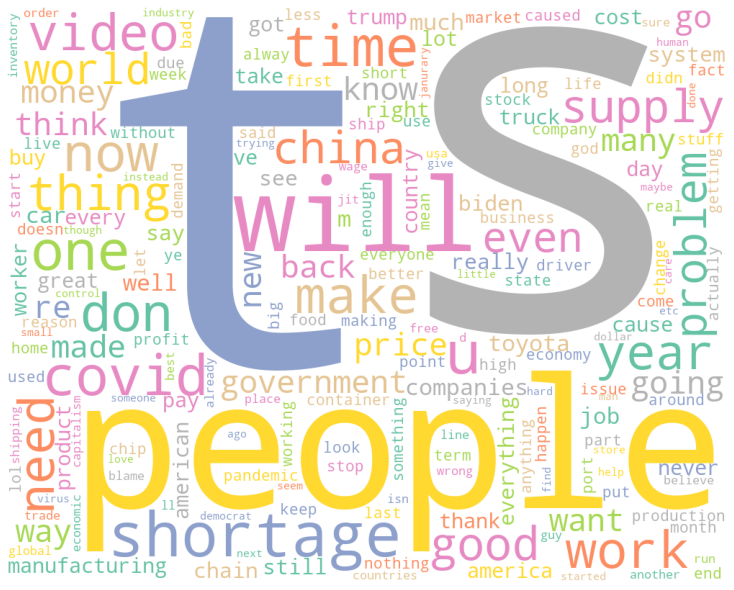

In [13]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [14]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 3.1 MB/s eta 0:00:01


In [15]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [17]:
df.dropna(subset=['cleaned_comments'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [18]:
df['Subjectivity'] = df['cleaned_comments'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_comments'].apply(getPolarity)
df.head()

,Comment,Time,Likes,Reply Count,cleaned_comments,Subjectivity,Polarity
0,2:01,2021-09-29T15:01:58Z,0,0.0,2 01,0.000000,0.000000
1,WHY MEDICAL SUPPLIES ARE SCAM ARTISTS. LOCATED...,2021-04-09T01:44:05Z,0,0.0,why medical supplies are scam artists located ...,0.000000,0.000000
2,Vechain. look into it. Not financial advice,2021-03-11T04:58:12Z,0,0.0,vechain look into it not financial advice,0.000000,0.000000
3,"community discussing repair, operation or sale...",2021-02-10T04:51:43Z,0,0.0,community discussing repair operation or sale ...,0.000000,0.000000
4,H2O2\n- is an endogenous substance indispensab...,2020-10-18T14:29:36Z,0,0.0,h2o2 is an endogenous substance indispensable ...,0.518268,0.194258


In [19]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

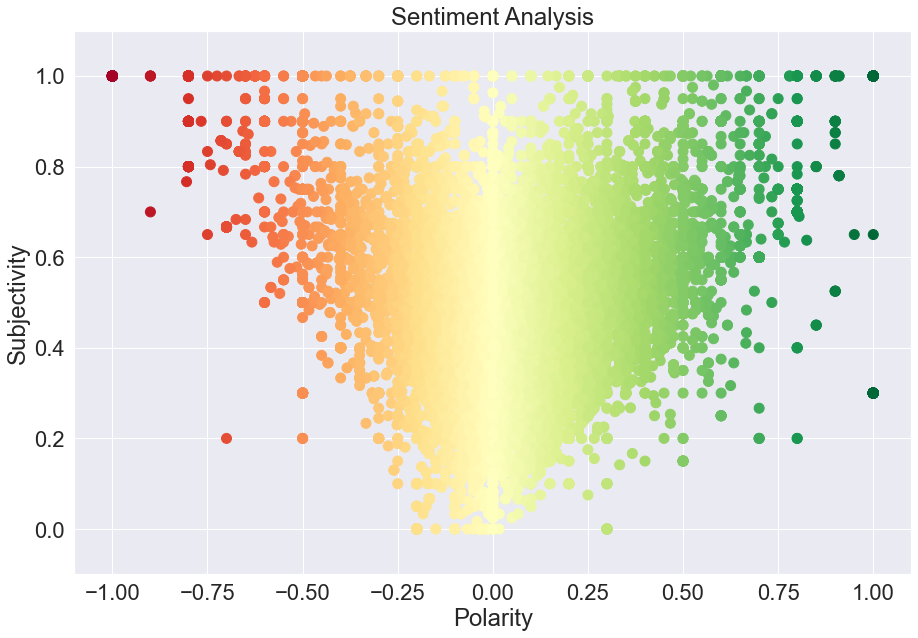

(None,)

In [21]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

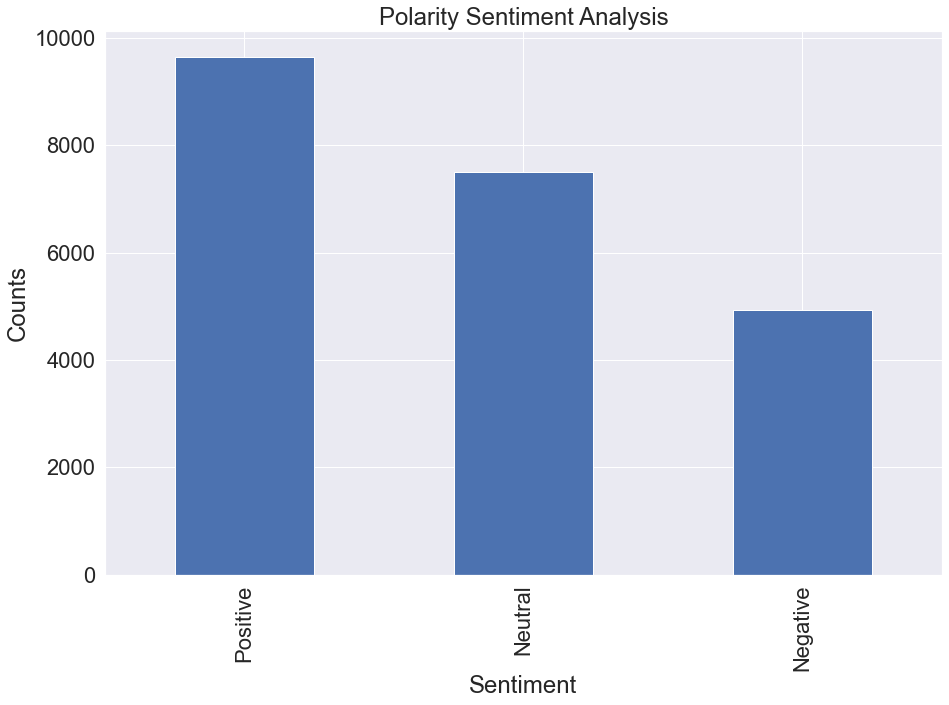

In [22]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

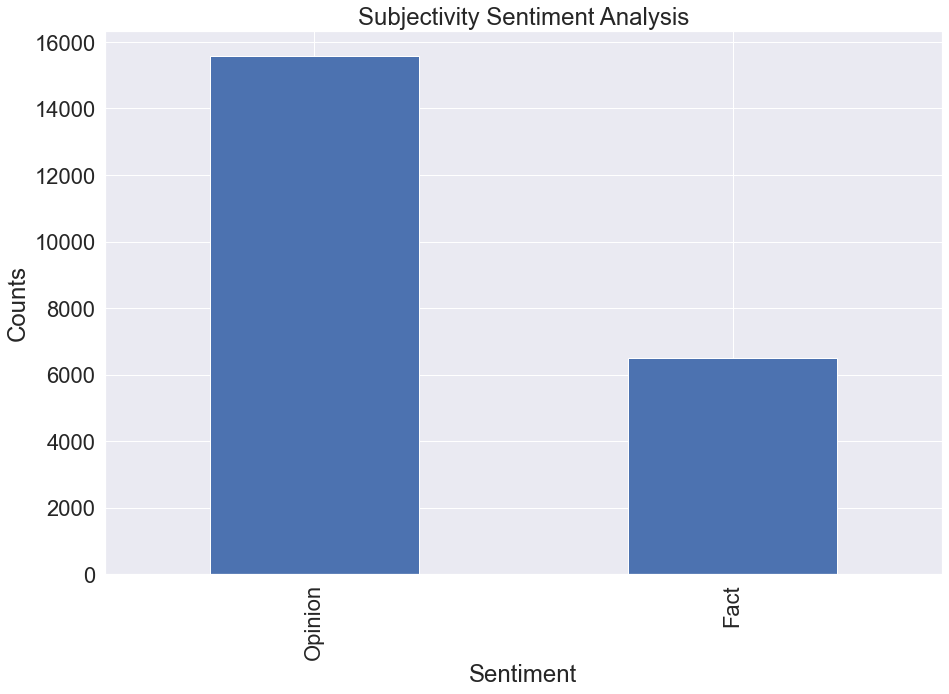

In [23]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()
